In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:/Users/admin/Downloads/9.ibm.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,32,No,Travel_Rarely,1093,Sales,6,4,Medical,1,125,...,1,80,0,12,0,3,11,8,5,7
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4


In [5]:
overtime_employees = df[df['OverTime'] == 'Yes']



In [7]:
selected_columns = ['EmployeeNumber', 'Department']
overtime_info = overtime_employees[selected_columns]
print(overtime_info)

    EmployeeNumber              Department
0                1                   Sales
2                4  Research & Development
3                5  Research & Development
6               10  Research & Development
11              15  Research & Development
14              19  Research & Development
16              21  Research & Development
17              22  Research & Development
19              24  Research & Development
26              33  Research & Development
31              40  Research & Development
34              45  Research & Development
36              47                   Sales
38              51  Research & Development
48              62                   Sales
50              64  Research & Development
51              65  Research & Development
52              68                   Sales
53              70  Research & Development
54              72                   Sales
55              73  Research & Development
57              75  Research & Development
60         

In [8]:
sorted_df = df.sort_values(by='YearsSinceLastPromotion', ascending=False)
last_5_promotions = sorted_df.head(5)
print(last_5_promotions)

    Age Attrition     BusinessTravel  DailyRate              Department  \
45   41       Yes      Travel_Rarely       1360  Research & Development   
62   50        No      Travel_Rarely        989  Research & Development   
64   36        No      Travel_Rarely       1223  Research & Development   
90   40        No  Travel_Frequently        530  Research & Development   
88   30        No      Travel_Rarely        288  Research & Development   

    DistanceFromHome  Education    EducationField  EmployeeCount  \
45                12          3  Technical Degree              1   
62                 7          2           Medical              1   
64                 8          3  Technical Degree              1   
90                 1          4     Life Sciences              1   
88                 2          3     Life Sciences              1   

    EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
45              58  ...                         4            80   
62    

In [9]:
department_avg_income = df.groupby('Department')['MonthlyIncome'].mean()


In [10]:
df = df.merge(department_avg_income, on='Department', suffixes=('', '_avg'))


In [11]:
high_income_employees = df[df['MonthlyIncome'] > df['MonthlyIncome_avg']]


In [12]:
selected_columns = ['EmployeeNumber', 'Department', 'MonthlyIncome', 'MonthlyIncome_avg']
high_income_info = high_income_employees[selected_columns]
print(high_income_info)

    EmployeeNumber              Department  MonthlyIncome  MonthlyIncome_avg
1               23                   Sales          15427        6624.370370
3               35                   Sales           6825        6624.370370
4               38                   Sales          18947        6624.370370
9               56                   Sales           8726        6624.370370
14              74                   Sales           9069        6624.370370
15              81                   Sales           7637        6624.370370
18             106                   Sales          10239        6624.370370
20             118                   Sales           9619        6624.370370
26             131                   Sales          13872        6624.370370
34              12  Research & Development           9526        5863.070423
41              20  Research & Development           9980        5863.070423
46              28  Research & Development          11994        5863.070423

In [13]:
highest_income_employee = df[df['MonthlyIncome'] == df['MonthlyIncome'].max()]
print(highest_income_employee)

    Age Attrition BusinessTravel  DailyRate              Department  \
62   41       Yes  Travel_Rarely       1360  Research & Development   

    DistanceFromHome  Education    EducationField  EmployeeCount  \
62                12          3  Technical Degree              1   

    EmployeeNumber  ...  StandardHours StockOptionLevel  TotalWorkingYears  \
62              58  ...             80                0                 23   

    TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
62                      0                3             22                  15   

   YearsSinceLastPromotion  YearsWithCurrManager  MonthlyIncome_avg  
62                      15                     8        5863.070423  

[1 rows x 36 columns]


In [14]:
x_feature = 'Age'
y_feature = 'MonthlyIncome'


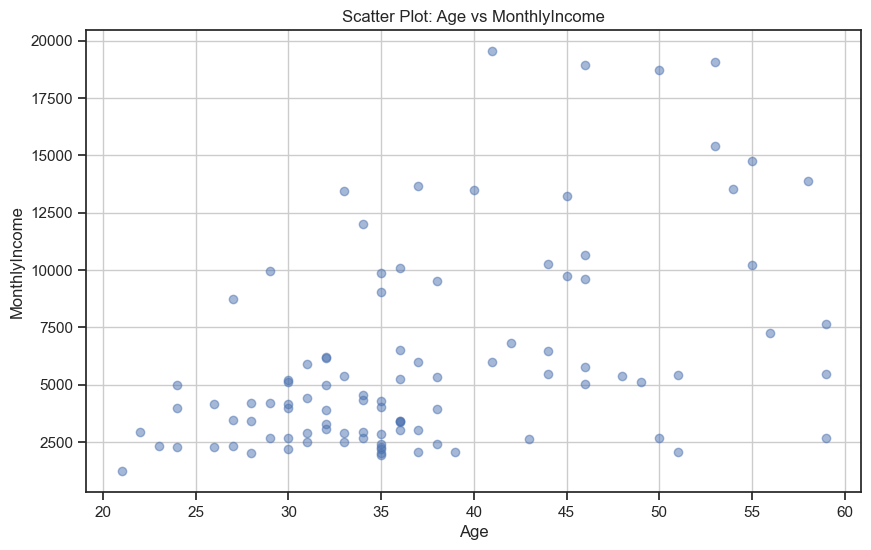

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df[x_feature], df[y_feature], alpha=0.5)
plt.title(f'Scatter Plot: {x_feature} vs {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [20]:
features = ['Age', 'MonthlyIncome']
target = 'Attrition'


In [21]:
X = df[features]
y = df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.70


In [26]:
desired_job_roles = ["Research Scientist", "Sales Executive"]
filtered_employees = df[df['JobRole'].isin(desired_job_roles)]


In [27]:
num_employees = len(filtered_employees)

In [28]:
print(f"Number of employees with desired job roles: {num_employees}")

Number of employees with desired job roles: 40


In [29]:
sorted_df = df.sort_values(by='MaritalStatus', ascending=True)
print(sorted_df)

    Age Attrition     BusinessTravel  DailyRate              Department  \
49   53        No      Travel_Rarely       1282  Research & Development   
38   31        No      Travel_Rarely        670  Research & Development   
39   34        No      Travel_Rarely       1346  Research & Development   
41   29        No      Travel_Rarely       1389  Research & Development   
42   32        No      Travel_Rarely        334  Research & Development   
..  ...       ...                ...        ...                     ...   
60   26       Yes      Travel_Rarely       1357  Research & Development   
61   30        No  Travel_Frequently        721  Research & Development   
65   48       Yes      Travel_Rarely        626  Research & Development   
11   46        No  Travel_Frequently       1211                   Sales   
0    41       Yes      Travel_Rarely       1102                   Sales   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
49                

In [30]:
medical_field_employees = df[df['EducationField'] == 'Medical']


In [31]:
print(medical_field_employees)

    Age Attrition     BusinessTravel  DailyRate              Department  \
20   46       Yes      Travel_Rarely        669                   Sales   
22   30        No      Travel_Rarely       1334                   Sales   
23   32        No      Travel_Rarely       1093                   Sales   
25   28        No         Non-Travel        120                   Sales   
26   58        No      Travel_Rarely        682                   Sales   
30   27        No      Travel_Rarely        591  Research & Development   
32   59        No      Travel_Rarely       1324  Research & Development   
35   36        No      Travel_Rarely       1299  Research & Development   
36   35        No      Travel_Rarely        809  Research & Development   
39   34        No      Travel_Rarely       1346  Research & Development   
43   22        No         Non-Travel       1123  Research & Development   
48   34       Yes      Travel_Rarely        699  Research & Development   
51   44        No      Tr

In [32]:
satisfied_employees_count = df[df['EnvironmentSatisfaction'] >= 3].shape[0]


In [33]:
print(f"Number of employees satisfied with the environment: {satisfied_employees_count}")

Number of employees satisfied with the environment: 53


In [34]:
average_income = df['MonthlyIncome'].mean()


In [35]:
high_income_employees = df[df['MonthlyIncome'] > average_income]
print(high_income_employees)

    Age Attrition     BusinessTravel  DailyRate              Department  \
1    53        No      Travel_Rarely       1219                   Sales   
3    42        No      Travel_Rarely        691                   Sales   
4    46        No      Travel_Rarely        705                   Sales   
9    27        No  Travel_Frequently        994                   Sales   
14   35        No  Travel_Frequently        853                   Sales   
15   59        No      Travel_Rarely       1435                   Sales   
18   55        No      Travel_Rarely        111                   Sales   
20   46       Yes      Travel_Rarely        669                   Sales   
26   58        No      Travel_Rarely        682                   Sales   
34   38        No  Travel_Frequently        216  Research & Development   
41   29        No      Travel_Rarely       1389  Research & Development   
46   34        No      Travel_Rarely        419  Research & Development   
49   53        No      Tr

In [36]:
older_employees = df[df['Age'] > 35]
print(older_employees)

    Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    53        No      Travel_Rarely       1219                   Sales   
2    36       Yes      Travel_Rarely       1218                   Sales   
3    42        No      Travel_Rarely        691                   Sales   
4    46        No      Travel_Rarely        705                   Sales   
5    39       Yes      Travel_Rarely        895                   Sales   
6    50       Yes      Travel_Rarely        869                   Sales   
11   46        No  Travel_Frequently       1211                   Sales   
12   44        No      Travel_Rarely       1488                   Sales   
15   59        No      Travel_Rarely       1435                   Sales   
16   59        No  Travel_Frequently       1225                   Sales   
18   55        No      Travel_Rarely        111                   Sales   
20   46       Yes      Tr

In [37]:
frequent_travel_count = df[df['BusinessTravel'] == 'Travel_Frequently'].shape[0]


In [38]:
print(f"Number of employees who travel frequently: {frequent_travel_count}")

Number of employees who travel frequently: 17


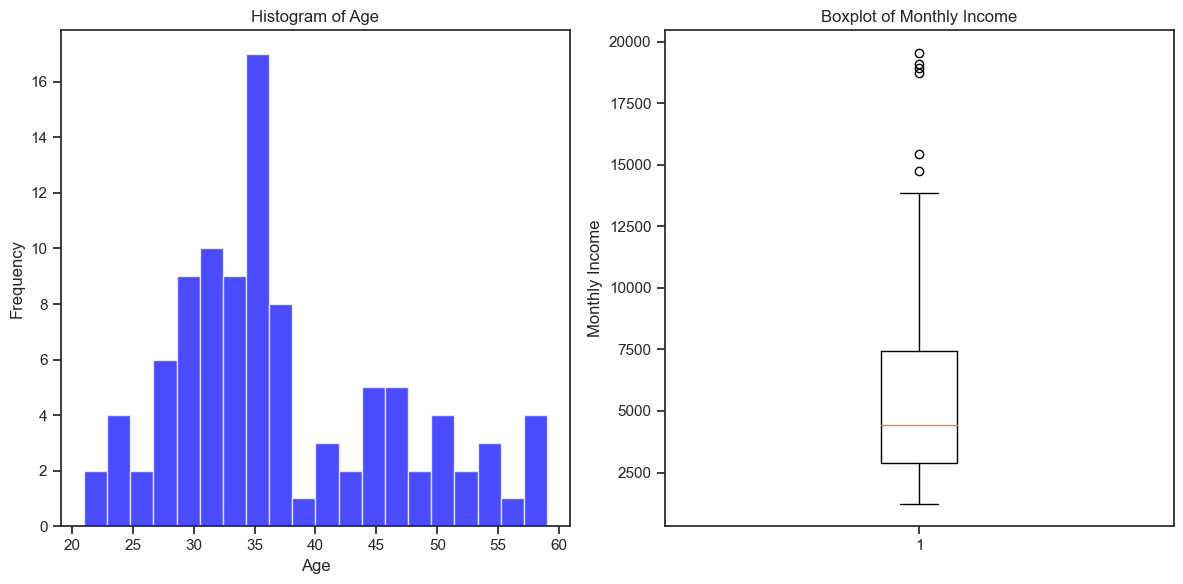

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].hist(df['Age'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')


axes[1].boxplot(df['MonthlyIncome'])
axes[1].set_title('Boxplot of Monthly Income')
axes[1].set_ylabel('Monthly Income')

plt.tight_layout()
plt.show()

In [42]:
selected_attribute = 'MonthlyIncome'


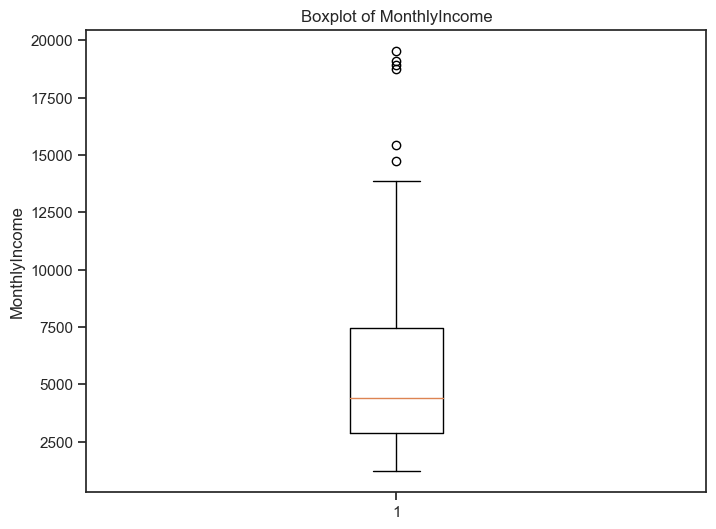

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot(df[selected_attribute])
plt.title(f'Boxplot of {selected_attribute}')
plt.ylabel(selected_attribute)
plt.show()

In [45]:
selected_columns = ['EmployeeNumber', 'YearsWithCurrManager']
print(df[selected_columns])

    EmployeeNumber  YearsWithCurrManager
0                1                     5
1               23                     7
2               27                     3
3               35                     2
4               38                     1
..             ...                   ...
94             117                     8
95             119                    11
96             124                     5
97             126                     3
98             103                     2

[99 rows x 2 columns]


In [46]:
leaving_count = df[df['Attrition'] == 'Yes'].shape[0]


In [47]:
print(f"Number of employees leaving the company: {leaving_count}")

Number of employees leaving the company: 15
